In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files 
import io

In [2]:
uploaded=files.upload()


Saving Whiskey.csv to Whiskey.csv


In [3]:
data=pd.read_csv(io.BytesIO(uploaded['Whiskey.csv']))
data

,date,Relative Interest
0,2010-01,41
1,2010-02,42
2,2010-03,44
3,2010-04,41
4,2010-05,39
...,...,...
67,2015-08,69
68,2015-09,63
69,2015-10,65
70,2015-11,87


In [6]:
data['date'] = pd.DatetimeIndex(data['date'])
data.head()

,date,Relative Interest
0,2010-01-01,41
1,2010-02-01,42
2,2010-03-01,44
3,2010-04-01,41
4,2010-05-01,39


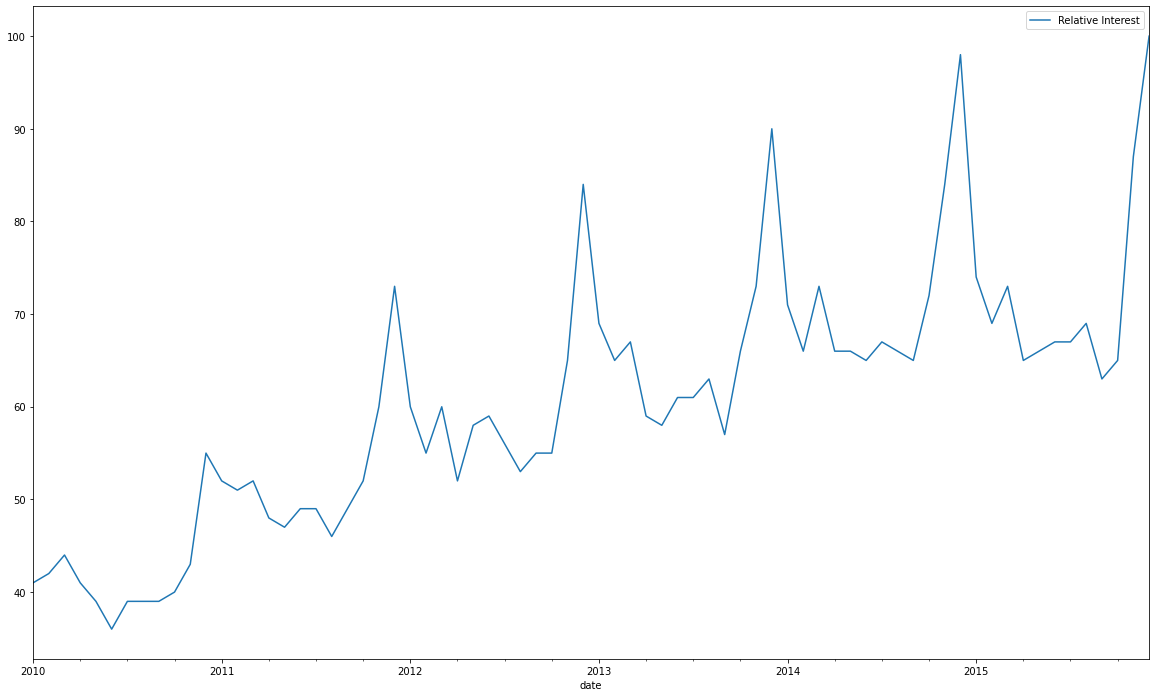

In [8]:
data.set_index('date').plot(figsize=(20, 12))

In [11]:
p =Prophet()

In [10]:
from prophet import Prophet
from prophet import Prophet


In [13]:
data = data.rename(columns={
    'date': 'ds',
    'Relative Interest': 'y'
})
data.head()

,ds,y
0,2010-01-01,41
1,2010-02-01,42
2,2010-03-01,44
3,2010-04-01,41
4,2010-05-01,39


In [14]:
p.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbytlg7um/gi55ccq0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbytlg7um/l9rje5jj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71709', 'data', 'file=/tmp/tmpbytlg7um/gi55ccq0.json', 'init=/tmp/tmpbytlg7um/l9rje5jj.json', 'output', 'file=/tmp/tmpbytlg7um/prophet_modelmipn8rzs/prophet_model-20221106064546.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:45:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:45:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
future = p.make_future_dataframe(periods=36, freq='MS')
future.tail()

,ds
103,2018-08-01
104,2018-09-01
105,2018-10-01
106,2018-11-01
107,2018-12-01


In [16]:
forecast = p.predict(future)

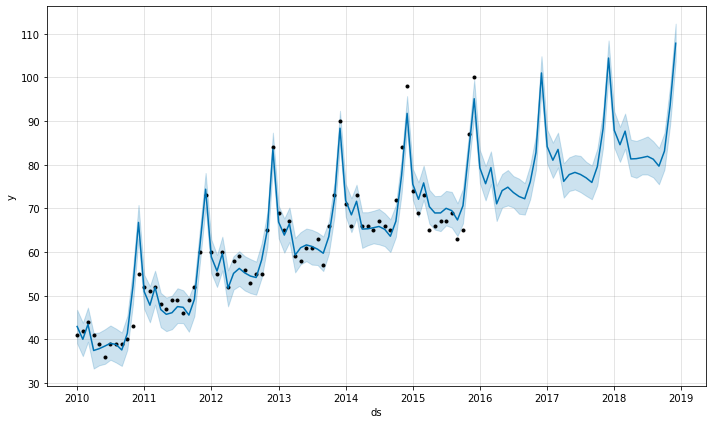

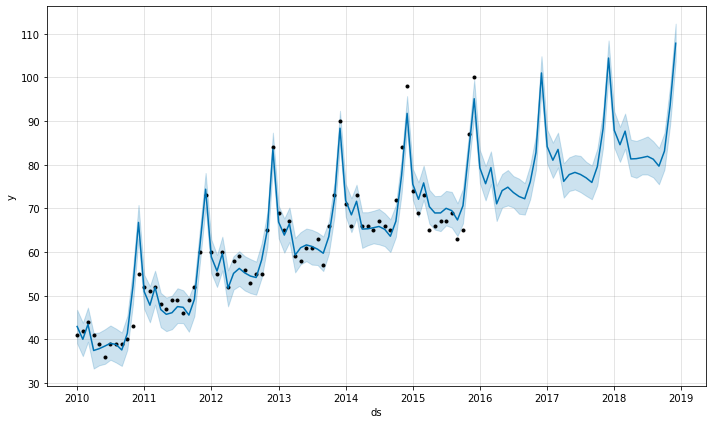

In [17]:
p.plot(forecast, uncertainty=True)